<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">pyGameOfLife</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);"><b style=color:red;>Game</b>Of<b style=color:red;>Life</b></p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
<td><img style="height: 150px;" src="images/pyGameOfLife.png"></td>
</tr>
</table>

----
# `pyGameOfLife`

Conway's Game of Life, the famous cellular automaton of [John Horton Conway](https://de.wikipedia.org/wiki/John_Horton_Conway) (1932-2020).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

----
## Initial grid
We start defining a rectangular grid with $N$ by $M$ nodal points.
The grid is initialized with `zeros`, marking **dead cells**.

In [2]:
def gridInit(N,M):
    """
    Conway's Game of Life
    initial state, only dead cells only
    input:
     N,M       - grid dimensions
    output:
     grid      - 2D grid field initialised with zeros (dead cells)
    use:
     grid = libGameOfLife.gridInit(N,M)
    """
    grid = np.zeros(N*M).reshape(N,M)
    return grid

----
## Plotting grid
Next, we define a function for plotting the grid, with two colors (dead and living cells).
An iteration counter `itime` is used to identify the time step.

In [3]:
def gridPlot(grid,itime,size=(6,6),plot=False):
    """
    function plots grid, uses own color table
    input:
     grid      - NxM grid
     itime     - time counter
    output:
     (to figure)
    use:
     libGameOfLife.gridPlot(grid,itime)
    """
    filename = "work/GoL-"+f"{itime:04}.png"
    colors = [( 0.9 , 0.9 , 0.9 ),( 1 , 0 , 0 )]
    myCmap = matplotlib.colors.ListedColormap(colors)
    plt.figure()
    plt.title(str(itime))
    plt.imshow(grid,cmap=myCmap)
    plt.axis('off')
    #plt.savefig(filename)
    plt.tight_layout()
    if (not plot):
        plt.close()
    return

As test reveals a boring image:

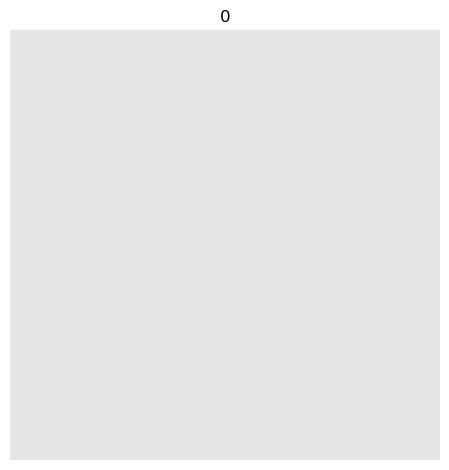

In [10]:
N,M = 5,5
itime = 0
grid = gridInit(N,M)
gridPlot(grid,itime,plot=True)

We move the two functions into our library `libGameOfLife.py`...

In [4]:
def addBlock(xoffset,yoffset,grid):
    """
    Conway's Game of Life
    block object (stable)
    11
    11
    input:
     xoffset,yoffset - offset positions of object
     grid            - 2D grid field 
    output:
     grid            - updated 2D grid field
    use:
     grid = libGameOfLife.addBlock(xoffset,yoffset,grid)
    """
    GoLobject = np.array([[1,1],[1,1]])
    grid[xoffset:xoffset+GoLobject.shape[0], yoffset:yoffset+GoLobject.shape[1]] = GoLobject
    return grid

def addBlinker(xoffset,yoffset,grid):
    """
    Conway's Game of Life
    blinker object (oscillator)
    111
    input:
     xoffset,yoffset - offset positions of object
     grid            - 2D grid field 
    output:
     grid            - updated 2D grid field
    use:
     grid = libGameOfLife.addBlinker(xoffset,yoffset,grid)
    """
    GoLobject = np.array([[1,1,1]])
    grid[xoffset:xoffset+GoLobject.shape[0], yoffset:yoffset+GoLobject.shape[1]] = GoLobject
    return grid

def addBipole(xoffset,yoffset,grid):
    """
    Conway's Game of Life
    add bipole object (oscillator)
    1100
    1000
    0001
    0011
    input:
     xoffset,yoffset - offset positions of object
     grid            - 2D grid field 
    output:
     grid            - updated 2D grid field
    use:
     grid = libGameOfLife.addBipole(xoffset,yoffset,grid)
    """
    GoLobject = np.array([[1,1,0,0],
                          [1,0,0,0],
                          [0,0,0,1],
                          [0,0,1,1]])
    grid[xoffset:xoffset+GoLobject.shape[0], yoffset:yoffset+GoLobject.shape[1]] = GoLobject
    return grid

def addGlider(xoffset,yoffset,grid):
    """
    Conway's Game of Life
    glider object (moving)
    010
    001
    111
    input:
     xoffset,yoffset - offset positions of object
     grid            - 2D grid field 
    output:
     grid            - updated 2D grid field
    use:
     grid = libGameOfLife.addGlider(xoffset,yoffset,grid)
    """
    GoLobject = np.array([[0,1,0],
                          [0,0,1],
                          [1,1,1]])
    grid[xoffset:xoffset+GoLobject.shape[0], yoffset:yoffset+GoLobject.shape[1]] = GoLobject
    return grid

In [5]:
grid = gridInit(11,15)
#grid = addBlinker(4,4,grid)
#grid = addBipole(4,4,grid)
grid = addGlider(2,2,grid)
print(grid)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


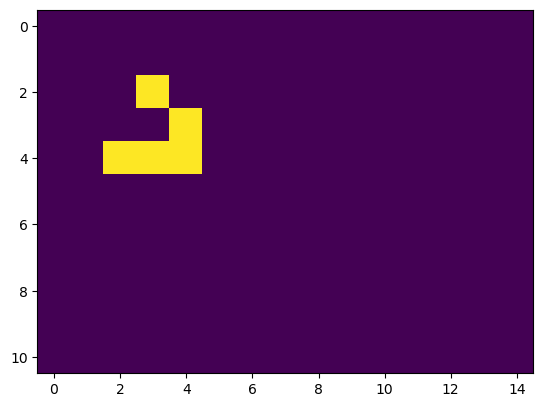

In [6]:
plt.imshow(grid)

In [ ]:
def gridUpdate(grid):
    # update 2D grid
    N = grid.shape[0]
    M = grid.shape[1]
    # first, make a copy of the old grid
    newgrid = grid.copy()
    # then, apply Conway's rules to each cell
    for i in range(N):
        for j in range(M):
            total = 0
            # top row of neighbors
            total += np.roll(grid,(1,1),(0,1))[i,j]   #grid[i-1,j-1]
            total += np.roll(grid,(1,0),(0,1))[i,j]   #grid[i-1,j]
            total += np.roll(grid,(1,-1),(0,1))[i,j]  #grid[i-1,j+1]
            # middle row of neighbors
            total += np.roll(grid,(0,1),(0,1))[i,j]   #grid[i,j-1]
            total += np.roll(grid,(0,-1),(0,1))[i,j]  #grid[i,j+1]
            # bottom row of neighbors
            total += np.roll(grid,(-1,1),(0,1))[i,j]  #grid[i+1,j-1]
            total += np.roll(grid,(-1,0),(0,1))[i,j]  #grid[i+1,j]
            total += np.roll(grid,(-1,-1),(0,1))[i,j] #grid[i+1,j+1]
            # fate of living cell
            if grid[i,j]  == 1: 
                if (total < 2) or (total > 3): 
                    newgrid[i,j] = 0 
            # fate of dead cell
            else: 
                if total == 3: 
                    newgrid[i,j] = 1
    grid[:] = newgrid[:]
    return grid

In [ ]:
def gridPlot(grid,itime,size=(6,6)):
    """
    function plots grid, uses own color table
    input:
     grid      - NxM grid
     itime     - time counter
    output:
     (to figure)
    use:
     libGameOfLife.gridPlot(grid,itime)
    """
    filename = "work/GoL-"+f"{itime:04}.png"
    colors = [( 0.9 , 0.9 , 0.9 ),( 1 , 0 , 0 )]
    myCmap = matplotlib.colors.ListedColormap(colors)
    plt.figure()
    plt.title(str(itime))
    plt.imshow(grid,cmap=myCmap)
    plt.axis('off')
    plt.savefig(filename)
    plt.tight_layout()
    plt.close()
    return

In [ ]:
grid = gridInit(21,30)
grid = addBlinker(4,14,grid)
#grid = addBlock(15,15,grid)
grid = addBipole(16,4,grid)
grid = addGlider(2,2,grid)
for itime in range(110):
    gridPlot(grid,itime,size=(10,5))
    grid = gridUpdate(grid)
    print(itime," ",end="")

----